# PROBLEM STATEMENT

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Data file.csv')
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [4]:
data = data.drop('Unnamed: 0',axis=1)

In [5]:
data.shape

(209593, 36)

In [8]:
# lets manipulate the date first and make its datatype as int

In [7]:
data['pdate'] = pd.to_datetime(data['pdate'], format = "%Y-%m-%d")

In [8]:
data['Day'] = data['pdate'].dt.day
data['Month'] = data['pdate'].dt.month
data['Year']  = data['pdate'].dt.year
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Day,Month,Year
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,20,7,2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12,0.0,0.000000,0.000000,UPW,2016-08-10,10,8,2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,19,8,2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,6,6,2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,22,6,2016


In [9]:
data = data.drop('pdate',axis=1)

In [10]:
data.shape

(209593, 38)

In [13]:
# lets check the data about Telecom circle

UPW    209593
Name: pcircle, dtype: int64


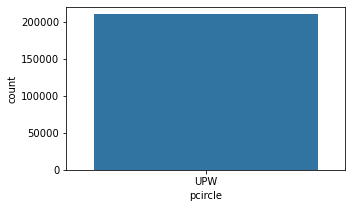

In [14]:
plt.figure(figsize=(5,3))
sns.countplot(data['pcircle'])
print(data['pcircle'].value_counts())

THERE IS ONLY ONE TELECOM CIRCLE i.e- UPW

In [15]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month,Year
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.0
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321,2016.0
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435,0.0
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000,2016.0
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000,2016.0
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000,2016.0
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000,2016.0
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000,2016.0


it clearly shows data have high variance

<AxesSubplot:xlabel='label', ylabel='daily_decr90'>

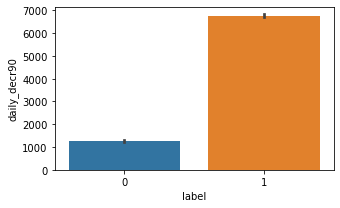

In [16]:
plt.figure(figsize=(5,3))
sns.barplot(x='label',y='daily_decr90',data=data)

THE CUSTOMERS WHO SPENT MORE THAN (AVG FROM 90 DAYS) 1300 INDONESIAN RUPIAH DAILY FROM MAIN ACCOUNT ARE PAID THERE LOAN BACK AND  WHICH HAVE LESS THAN 1300 RUPIAH ARE BOTH WHO PAID AND NOT PAID THE LOANS.

<AxesSubplot:xlabel='label', ylabel='rental90'>

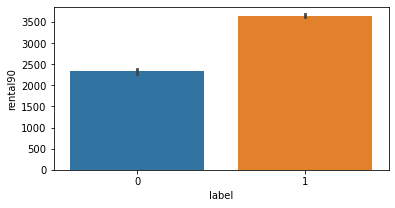

In [17]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='rental90',data=data)

THE CUSTOMERS WHOSE MAIN ACCOUNT HAVE MORE THAN 2200 INDONESIAN RUPIAH FROM LAST 90 DAYS WERE PAID THEIR LOANS AND THERE ARE BOTH TYPE OF CUSTOMERS FROM WHO  HAVE LESS THAN  2200 RUPIAH  GIVE THEIR  LOANS  BACK  AND OYHER  WHO NOT PAID THEIR LOANS

<AxesSubplot:xlabel='label', ylabel='last_rech_amt_ma'>

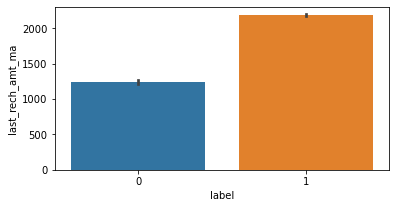

In [21]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='last_rech_amt_ma',data=data)

THE CUSTOMERS WHICH RECHAREGED THEIR LAST RECHARGE MORE THAN (APPROX) 1300 RUPIAH FROM THERE MAIN ACCOUNT ARE ALWAYS PAID THERE LOANS BUT BELOW THESE RUPIAH  BOTH TYPES OF CUSTOMERS ARE PRESENT

<AxesSubplot:xlabel='label', ylabel='cnt_ma_rech30'>

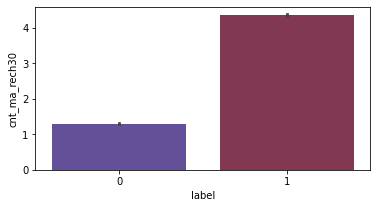

In [24]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='cnt_ma_rech30',data=data,palette='twilight')

THE MAXIMUM NUMBERS OF TIMES  MAIN ACCOUNT GOT RECHARGED IS 4 BUT THE CUSTOMER WHO RECHARGED THEIR  MAIN ACCOUNT MORE THAN ONCE IN 30 DAYS ALWAYS PAID THEIR LOAN BUT THE CUSTOMERS WHO RECHARED THERE MAIN ACCOUNT ONLY ONCE IN 30 DAYS HAVING BOTH TYPES OF CUSTOMERS WHO PAID OR PAID NOT THERE LOANS

<AxesSubplot:xlabel='label', ylabel='sumamnt_ma_rech30'>

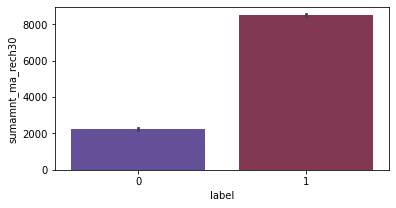

In [26]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='sumamnt_ma_rech30',data=data,palette='twilight')

THE CUSTOMERS WHO HAVE TOTAL AMOUNT OF RECHARGES IN MAIN ACCOUNT MORE THAN (APPROX) 2000 OVER LAST 30 DAYS ALWAYS PAID THEIR LOAN BUT THE CUSTOMERS WHOSE TOATL AMOUNT OF RECHARGE IS LESS THAN 2000 OVER IN 30 DAYS HAVING BOTH TYPES OF CUSTOMERS WHO PAID OR  NOT PAID THERE LOANS

<AxesSubplot:xlabel='label', ylabel='medianamnt_ma_rech30'>

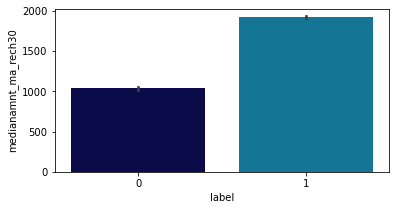

In [28]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='medianamnt_ma_rech30',data=data,palette='ocean')

THE CUSTOMERS WHO HAVE MORE THAN 1000 RUPIAH MEDIAN OF AMOUNT OF RECHARGES DONE IN MAIN ACCOUNT OVER LAST 30 DAYS AT USER LEVEL  ALWAYS PAID THEIR LOAN BUT THE CUSTOMERS WHOSE LESS THAN 1000 RUPIAH HAVING BOTH TYPES OF CUSTOMERS WHO PAID OR  NOT PAID THERE LOANS

<AxesSubplot:xlabel='label', ylabel='medianmarechprebal30'>

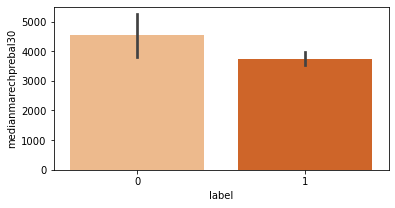

In [30]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='medianmarechprebal30',data=data,palette='Oranges')

THE CUSTOMERS WHO HAVE MORE THAN 3500 RUPIAH MEDIAN OF MAIN ACCOUNT BALANCE JUST BEFORE RECHAREGE IN LAST 30 DAYS AT USER LEVEL NEVER PAID THEIR LOAN BUT THE CUSTOMERS WHOSE MEDIAN OF MAIN ACCOUNT BALANCE IS LESS THAN 3500 RUPIAH HAVING BOTH TYPES OF CUSTOMERS WHO PAID OR NOT PAID THERE LOANS

<AxesSubplot:xlabel='label', ylabel='cnt_ma_rech90'>

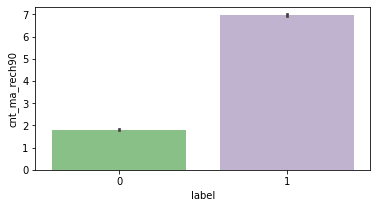

In [31]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='cnt_ma_rech90',data=data,palette='Accent')

THE MAXIMUM NUMBERS OF TIMES  MAIN ACCOUNT GOT RECHARGED IS 7 IN LAST 90 DAYS BUT THE CUSTOMER WHO RECHARGED THEIR  MAIN ACCOUNT MORE THAN 2 TIMES  IN LAST 90  DAYS ALWAYS PAID THEIR LOAN BUT THE CUSTOMERS WHO RECHARED THERE MAIN ACCOUNT ONLY 2 TIMES  IN LAST 90 DAYS HAVING BOTH TYPES OF CUSTOMERS WHO PAID OR  NOT PAID THERE LOANS

<AxesSubplot:xlabel='label', ylabel='fr_ma_rech90'>

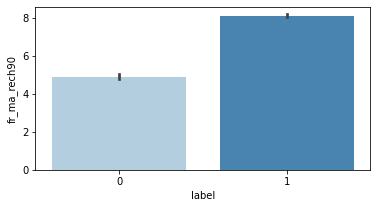

In [32]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='fr_ma_rech90',data=data,palette='Blues')

THE FREQUENCY OF MAIN ACCOUNT RECHARGED MAXIMUM IS 8 IN LAST 90 DAYS BUT THE CUSTOMER WHOSE FREQUNECY OF MAIN ACCOUNT  RECHARGED IS  MORE THAN 5 TIMES IN LAST 90 DAYS ALWAYS PAID THEIR LOAN BUT THE CUSTOMERS WHO RECHARED THERE MAIN ACCOUNT ONLY 5 TIMES IN LAST 90 DAYS HAVING BOTH TYPES OF CUSTOMERS WHO PAID OR NOT PAID THERE LOANS

<AxesSubplot:xlabel='label', ylabel='sumamnt_ma_rech90'>

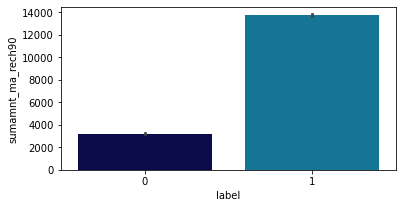

In [33]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='sumamnt_ma_rech90',data=data,palette='ocean')

THE CUSTOMERS WHO HAVE TOTAL AMOUNT OF RECHARGES IN MAIN ACCOUNT MORE THAN (APPROX) 3500 OVER LAST 90 DAYS ALWAYS PAID THEIR LOAN BUT THE CUSTOMERS WHOSE TOATL AMOUNT OF RECHARGE IS LESS THAN 3500 OVER IN 90 DAYS HAVING BOTH TYPES OF CUSTOMERS WHO PAID OR  NOT PAID THERE LOANS

<AxesSubplot:xlabel='label', ylabel='medianamnt_ma_rech90'>

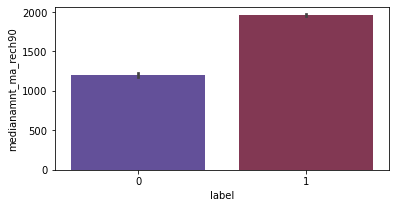

In [34]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='medianamnt_ma_rech90',data=data,palette='twilight')

THE CUSTOMERS WHO HAVE MORE THAN (APPROX) 1200 RUPIAH MEDIAN OF AMOUNT OF RECHARGES DONE IN MAIN ACCOUNT OVER LAST 90 DAYS AT USER LEVEL ALWAYS PAID THEIR LOAN BUT THE CUSTOMERS WHOSE LESS THAN 1200 RUPIAH HAVING BOTH TYPES OF CUSTOMERS WHO PAID OR NOT PAID THERE LOANS

<AxesSubplot:xlabel='label', ylabel='medianmarechprebal90'>

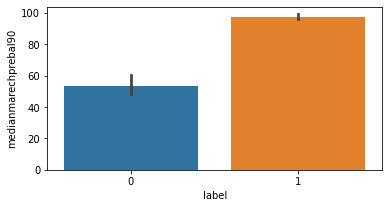

In [35]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='medianmarechprebal90',data=data)

THE CUSTOMERS WHO HAVE MORE THAN 50 RUPIAH MEDIAN OF MAIN ACCOUNT BALANCE JUST BEFORE RECHAREGE IN LAST 90 DAYS AT USER LEVEL ALWAYS PAID THEIR LOAN BUT THE CUSTOMERS WHOSE MEDIAN OF MAIN ACCOUNT BALANCE IS LESS THAN 50 RUPIAH HAVING BOTH TYPES OF CUSTOMERS WHO PAID OR NOT PAID THERE LOANS

<AxesSubplot:xlabel='label', ylabel='cnt_da_rech30'>

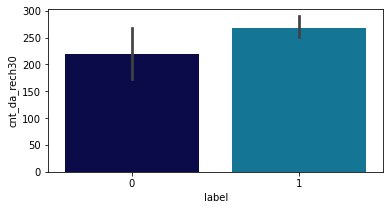

In [36]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='cnt_da_rech30',data=data,palette='ocean')

THE CUSTOMERS WHO SPENT OF  TOTAL AMOUNT OF RECHARGES ON DATA  MORE THAN (APPROX) 230 RUPIAH IN LAST 30 DAYS ALWAYS PAID THEIR LOAN BUT THE CUSTOMERS WHOSE TOTAL AMOUNT OF RECHARGE ON DATA IS LESS THAN 230 OVER IN 30 DAYS HAVING BOTH TYPES OF CUSTOMERS WHO PAID OR  NOT PAID THERE LOANS

<AxesSubplot:xlabel='label', ylabel='fr_da_rech30'>

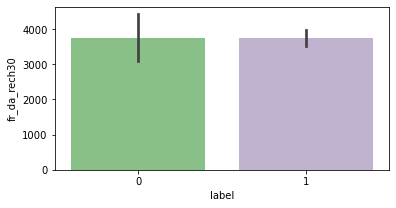

In [42]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='fr_da_rech30',data=data,palette='Accent')

THE FREQUNECY OF DATA ACCOUNT RECHARGED IN 30 DAYS IS VERY SIMLILAR FOR BOTH WHO PAID THERE LOANS OR WHO DOES NOT BUT THS DATA NOT LOOKING AS THE FREQUENCY FOR 30 DAYS

<AxesSubplot:xlabel='label', ylabel='cnt_da_rech90'>

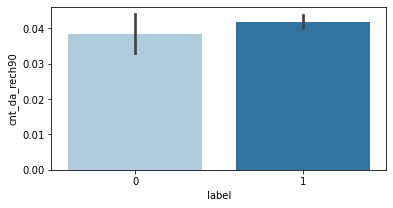

In [43]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='cnt_da_rech90',data=data,palette='Paired')

THE NUMBER OF TIMES OF DATA ACCOUNT RECHARGED IN 90 DAYS IS VERY SIMLILAR FOR BOTH WHO PAID THERE LOANS OR WHO DOES NOT....

<AxesSubplot:xlabel='label', ylabel='fr_da_rech90'>

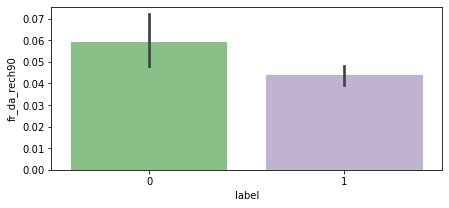

In [44]:
plt.figure(figsize=(7,3))
sns.barplot(x='label',y='fr_da_rech90',data=data,palette='Accent')

IF THE FREQUNECY OF DATA ACCOUNT RECHARGED IN 90 DAYS IS MORE THAN O.O4 THEN THE CUSTOMER NEVER PADI THE LOANS BUT WHEN IT IS LESS THAN 0.04 THEN THERE ARE BOTH TYPE OF CUSTOMER WHO PAID THEIR LOANS OR WHO DOES NOT 

<AxesSubplot:xlabel='label', ylabel='cnt_loans30'>

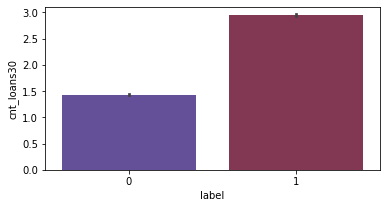

In [45]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='cnt_loans30',data=data,palette='twilight')

IF THE NUMBER OF LOANS TAKEN BY USER IN THE LAST 30 DAYS IS MORE THAN 1 THEN THE CUSTOMER ALWAYS PAID THE LOAN BACK BUT IF LESS THAN 1 THEN THE CUSTOMERS ARE OF BOTH TYPES ONE WHO PAID AND OTHER ONE  WHO NOT PAID

<AxesSubplot:xlabel='label', ylabel='amnt_loans30'>

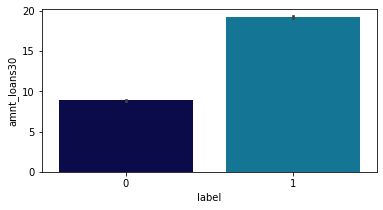

In [47]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='amnt_loans30',data=data,palette='ocean')

IF THE TOTAL AMOUNT OF LOAN TAKEN BY THE USER IN THE LAST 30 DAYS MORE THAN 10 THEN THE CUSTOMER ALWAYS PAID THE LOAN BUT IF IT LESS THAN 10 THEN THE CUSTOMERS ARE OF BOTH TYPES ONE WHO PAID AND OTHER ONE  WHO NOT PAID

<AxesSubplot:xlabel='label', ylabel='maxamnt_loans30'>

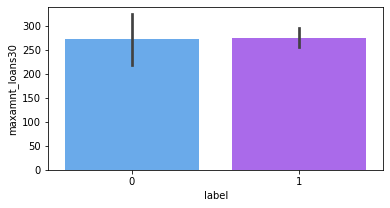

In [49]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='maxamnt_loans30',data=data,palette='cool')

THE DATA IS ALMOST EQUAL FOR BOTH THE CUSTOMER WHO PAID THE LOANS BACK AND ONE WHO DOES NOT PAID

<AxesSubplot:xlabel='label', ylabel='medianamnt_loans30'>

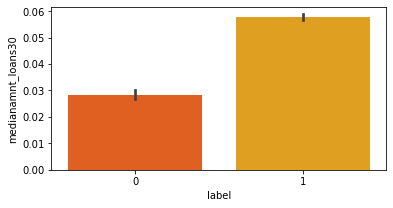

In [50]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='medianamnt_loans30',data=data,palette='autumn')

IF THE MEDIAN AMOUNT OF LOAN TAKEN BY THE USER IN THE LAST 30 DAYS MORE THAN 0.03 THEN THE CUSTOMER ALWAYS PAID THE LOAN BUT IF IT LESS THAN 0.03M THEN THE CUSTOMERS ARE OF BOTH TYPES ONE WHO PAID AND OTHER ONE  WHO NOT PAID

<AxesSubplot:xlabel='label', ylabel='cnt_loans90'>

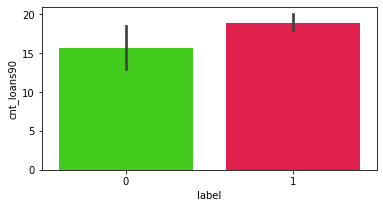

In [53]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='cnt_loans90',data=data,palette='prism')

IF THE NUMBER OF LOANS TAKEN BY USER IN THE LAST 90 DAYS IS MORE THAN 15 THEN THE CUSTOMER ALWAYS PAID THE LOAN BACK BUT IF LESS THAN 15 THEN THE CUSTOMERS ARE OF BOTH TYPES ONE WHO PAID AND OTHER ONE  WHO NOT PAID

<AxesSubplot:xlabel='label', ylabel='amnt_loans90'>

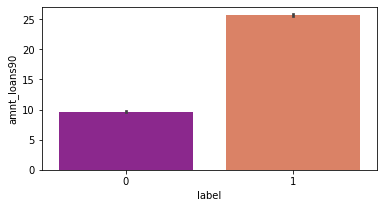

In [54]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='amnt_loans90',data=data,palette='plasma')

IF THE TOTAL AMOUNT OF LOAN TAKEN BY THE USER IN THE LAST 90 DAYS MORE THAN 10 THEN THE CUSTOMER ALWAYS PAID THE LOAN BUT IF IT LESS THAN 10 THEN THE CUSTOMERS ARE OF BOTH TYPES ONE WHO PAID AND OTHER ONE WHO NOT PAID

<AxesSubplot:xlabel='label', ylabel='maxamnt_loans90'>

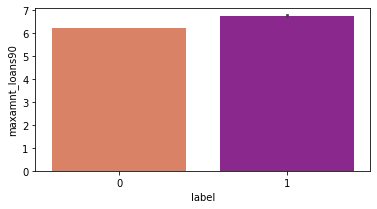

In [55]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='maxamnt_loans90',data=data,palette='plasma_r')

THE DATA IS SIMILAR  FOR BOTH THE CUSTOMER WHO PAID THE LOANS BACK AND ONE WHO DOES NOT PAID

<AxesSubplot:xlabel='label', ylabel='medianamnt_loans90'>

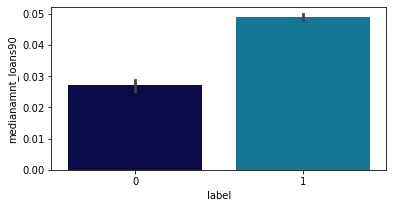

In [57]:
plt.figure(figsize=(6,3))
sns.barplot(x='label',y='medianamnt_loans90',data=data,palette='ocean')

IF THE MEDIAN AMOUNT OF LOAN TAKEN BY THE USER IN THE LAST 90 DAYS MORE THAN 0.03 THEN THE CUSTOMER ALWAYS PAID THE LOAN BUT IF IT LESS THAN 0.03 THEN THE CUSTOMERS ARE OF BOTH TYPES ONE WHO PAID AND OTHER ONE WHO NOT PAID

<AxesSubplot:xlabel='label', ylabel='payback30'>

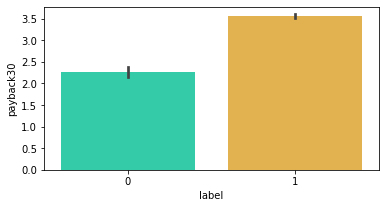

In [65]:
plt.figure(figsize=(6,3))
sns.barplot(data = data, x = 'label',y='payback30',palette = 'turbo')

WHEN THE AVERAGE PAYBACK TIME IS MORE THAN 2 DAYS OVER LAST 30 DAYS THEN THE CUSTOMER ALWAYS PAID THEIR LOANS BUT WHEN IT LESS THAN 2 DAYS THEN THERE ARE BOTH TYPES OF CUSTOMERS PRESENT

<AxesSubplot:xlabel='label', ylabel='payback90'>

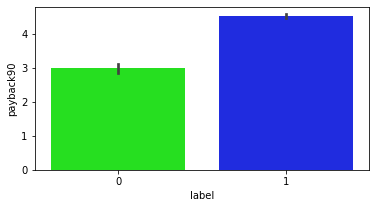

In [67]:
plt.figure(figsize=(6,3))
sns.barplot(data = data, x = 'label',y='payback90',palette = 'hsv')

WHEN THE AVERAGE PAYBACK TIME IS MORE THAN 3 DAYS OVER LAST 90 DAYS THEN THE CUSTOMER ALWAYS PAID THEIR LOANS BUT WHEN IT LESS THAN 3 DAYS THEN THERE ARE BOTH TYPES OF CUSTOMERS PRESENT

<AxesSubplot:xlabel='label', ylabel='count'>

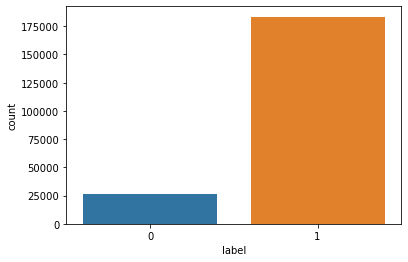

In [335]:
sns.countplot(data['label'])

# CLEARLY DATA IS IMBALANCED DATA SO WE SHOULD USE SOME BALANCING TECHNIQUES LIKE SMOTE,PSA ETC AFTER SCALING THE DATA

In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

# LETS CHANGE SOME DATA FROM OBJECT DATATYPE SO WE CAN MAKE UNDERSTANDABLE FOR MACHINE

In [11]:
data['msisdn'] = data['msisdn'].str.replace("I",'0')

In [12]:
data['msisdn'] = data['msisdn'].astype('int64')

In [13]:
data['pcircle'] = data['pcircle'].str.replace("UPW",'1')

In [14]:
data['pcircle'] = data['pcircle'].astype(int)

# LETS CHECK THE CORRELATION

In [83]:
data.corr()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Day,Month,Year
label,1.000000,0.001945,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,NaN,0.006825,0.154949,NaN
msisdn,0.001945,1.000000,0.000555,0.000669,0.000903,-0.001437,-0.000728,-0.000949,0.001404,-0.002356,...,0.001908,-0.000222,0.003282,0.001213,0.002907,0.002655,NaN,0.002488,-0.003019,NaN
aon,-0.003785,0.000555,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,NaN,0.000662,-0.001863,NaN
daily_decr30,0.168298,0.000669,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,NaN,0.006477,0.518664,NaN
daily_decr90,0.166150,0.000903,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,NaN,-0.021508,0.539410,NaN
rental30,0.058085,-0.001437,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,NaN,0.036537,0.365699,NaN
rental90,0.075521,-0.000728,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,NaN,0.008941,0.429407,NaN
last_rech_date_ma,0.003728,-0.000949,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,NaN,0.000560,-0.001207,NaN
last_rech_date_da,0.001711,0.001404,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,NaN,0.000631,-0.001800,NaN
last_rech_amt_ma,0.131804,-0.002356,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,NaN,0.028883,0.096919,NaN


<AxesSubplot:>

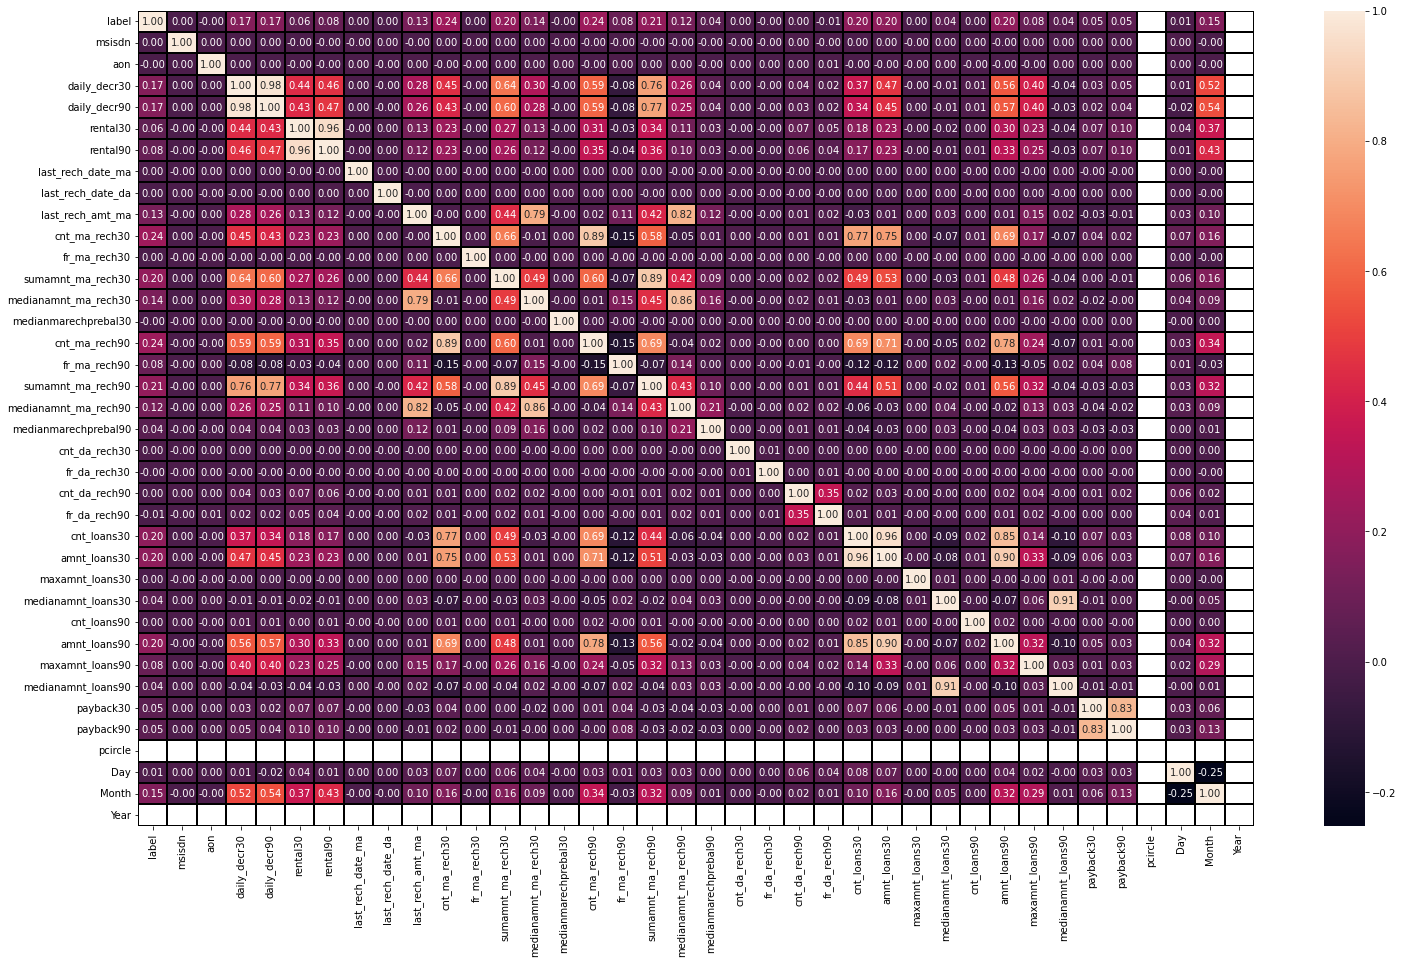

In [84]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),annot=True,linewidth = 0.2,linecolor = 'black',fmt='0.2f')

CLEARLY THERE ARE SOME COLUMNS SHOWS MULTICOLLINEARITY WHOSE CORRELATION VALUE IS GREATER THAN 90 

daily_decr30 and daily_decr90 shows 0.98

rental_30 and rental_90 shows 0.96

summant_ma_rech30 and summant_ma_rech90 shows 0.89

cnt_loans30 and amnt_loans30 shows 0.96

amnt_loans30 and amnt_loans90 shows 0.90

medimant_loans30 and medimants_loans90 sjows 0.91

msisdn is 0% correlated wiht the label

aon is 0% correlated with the label and there are many more columns which are 0% correlated with the label

# LETS CHECK THE SKEWNESS IN THE COLUMNS

In [15]:
# seprating the columns into features and target
x= data.drop("label",axis=1)
y= data["label"]

In [16]:
x.head()

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Day,Month,Year
0,21408070789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2.0,12,6,0.0,29.000000,29.000000,1,20,7,2016
1,76462070374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1.0,12,12,0.0,0.000000,0.000000,1,10,8,2016
2,17943070372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1.0,6,6,0.0,0.000000,0.000000,1,19,8,2016
3,55773070781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2.0,12,6,0.0,0.000000,0.000000,1,6,6,2016
4,3813082730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7.0,42,6,0.0,2.333333,2.333333,1,22,6,2016


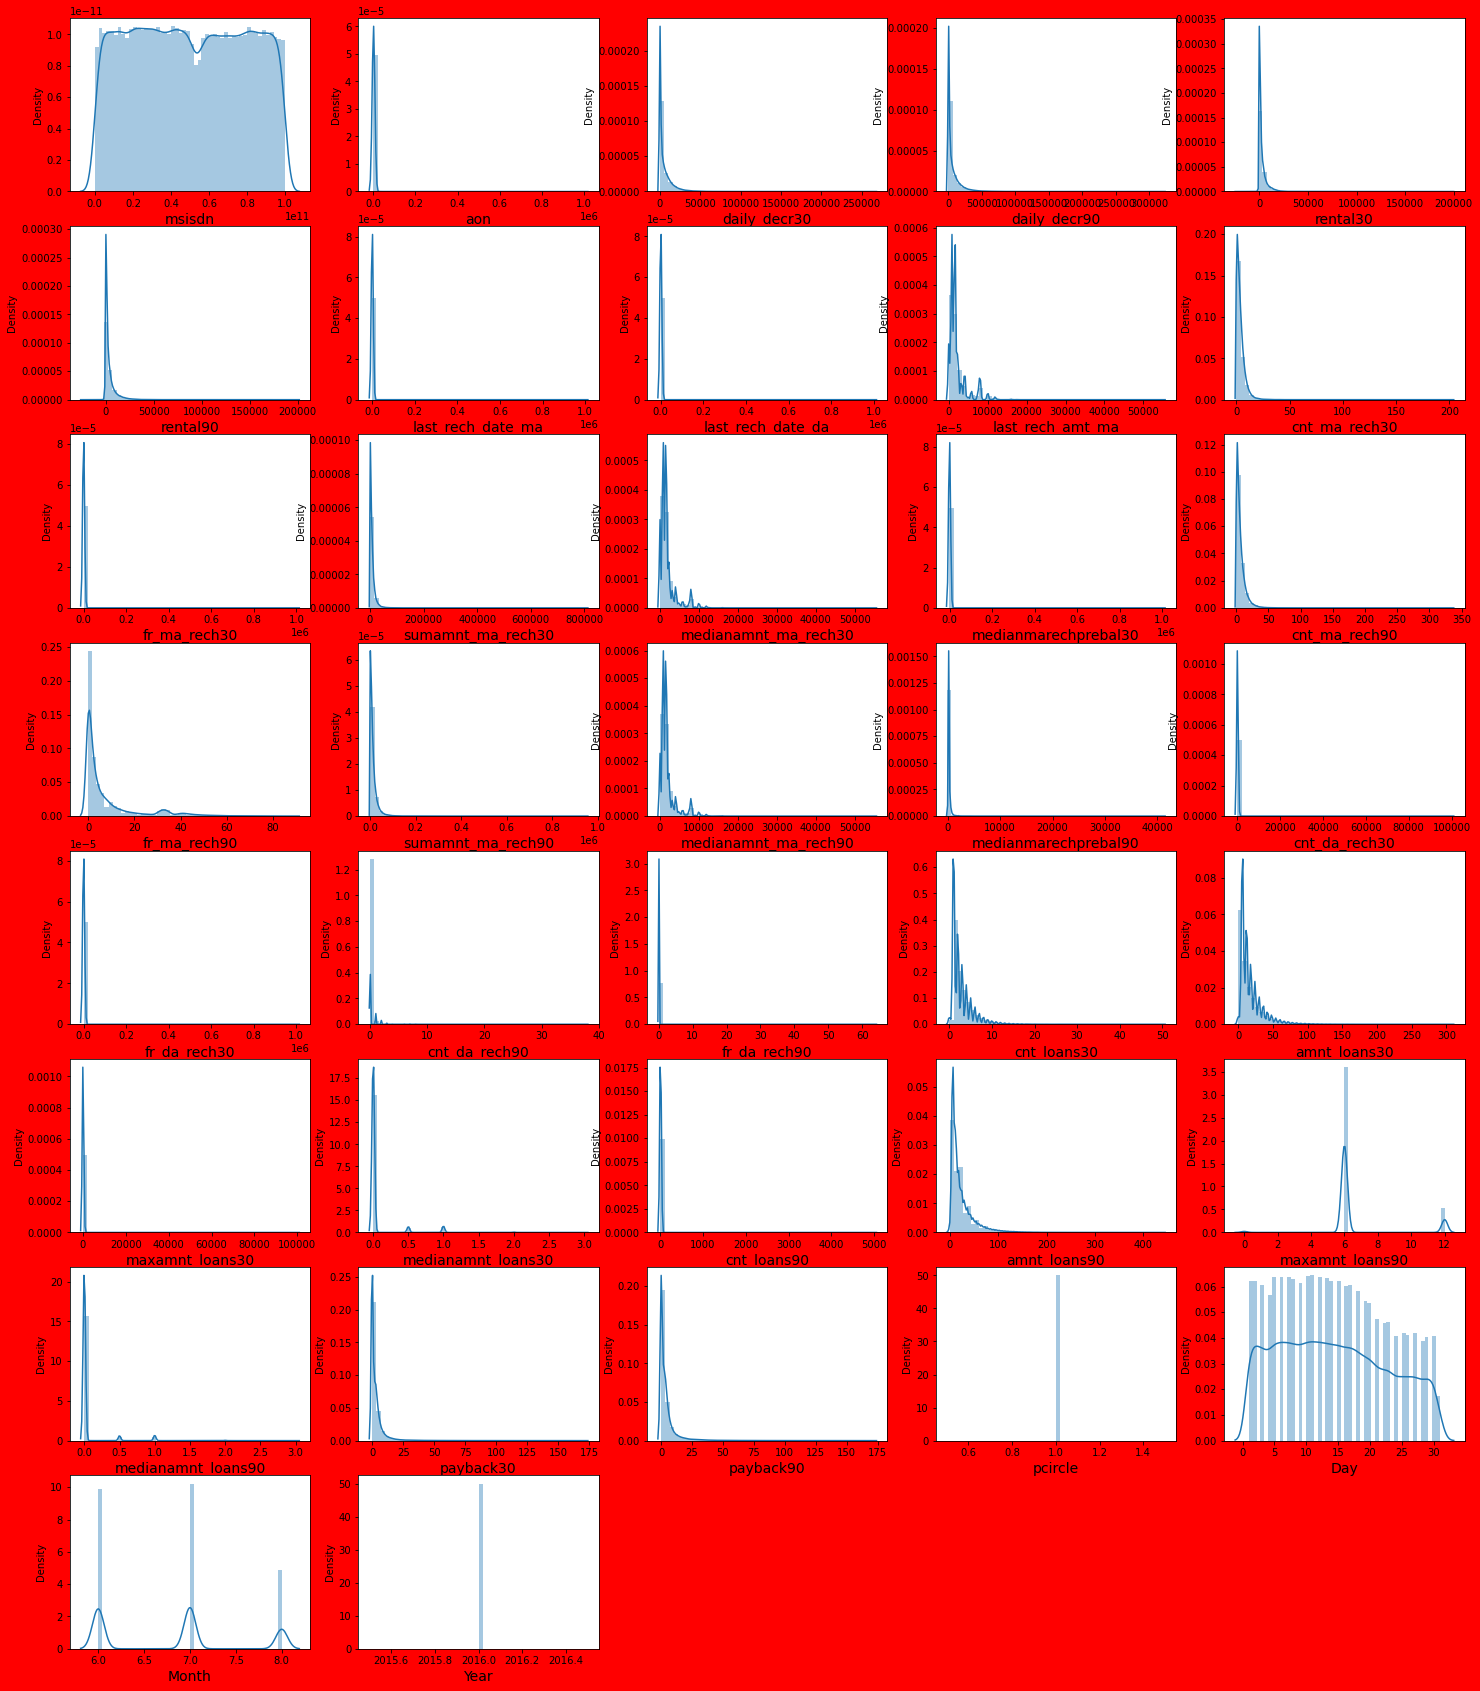

In [343]:
plt.figure(figsize = (25,30),facecolor = "red")
plotnumber = 1
for column in x:
    if plotnumber<=37:
        ax=plt.subplot(8,5,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=14)
        
    plotnumber+=1
plt.show()

In [440]:
data.skew()

label                   -2.270254
msisdn                   0.018124
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

In [17]:
 data['aon'] = np.sqrt(data['aon'])

In [18]:
data['daily_decr30'] = np.cbrt(data['daily_decr30'])

In [19]:
data['daily_decr90'] = np.cbrt(data['daily_decr90'])

In [20]:
data['rental30'] = np.cbrt(data['rental30'])

In [21]:
data['rental90'] = np.cbrt(data['rental90'])

In [22]:
data['last_rech_date_ma'] = np.sqrt(data['last_rech_date_ma'])

In [23]:
data['last_rech_date_da'] = np.sqrt(data['last_rech_date_da'])

In [24]:
data['last_rech_amt_ma'] = np.cbrt(data['last_rech_amt_ma'])

In [25]:
data['cnt_ma_rech30'] = np.cbrt(data['cnt_ma_rech30'])

In [26]:
data['fr_ma_rech90'] = np.cbrt(data['fr_ma_rech90'])

In [27]:
data['sumamnt_ma_rech30'] = np.sqrt(data['sumamnt_ma_rech30'])

In [28]:
data['medianamnt_ma_rech90'] = np.cbrt(data['medianamnt_ma_rech90'])

In [29]:
data['medianmarechprebal30'] = np.sqrt(data['medianmarechprebal30'])

In [30]:
data['cnt_ma_rech90'] = np.cbrt(data['cnt_ma_rech90'])

In [31]:
data['sumamnt_ma_rech90'] = np.cbrt(data['sumamnt_ma_rech90'])

In [32]:
data['medianmarechprebal90'] = np.sqrt(data['medianmarechprebal90'])

In [33]:
data['cnt_da_rech30'] = np.sqrt(data['cnt_da_rech30'])

In [34]:
data['fr_da_rech30'] = np.sqrt(data['fr_da_rech30'])

In [35]:
data['cnt_da_rech90'] = np.sqrt(data['cnt_da_rech90'])

In [36]:
data['fr_da_rech90'] = np.sqrt(data['fr_da_rech90'])

In [37]:
data['maxamnt_loans30'] = np.sqrt(data['maxamnt_loans30'])

In [38]:
data['medianamnt_loans30'] = np.cbrt(data['medianamnt_loans30'])

In [39]:
data['cnt_loans90'] = np.sqrt(data['cnt_loans90'])

In [40]:
data['medianamnt_loans90'] = np.cbrt(data['medianamnt_loans90'])

In [41]:
data['payback30'] = np.sqrt(data['payback30'])

In [42]:
data['payback90'] = np.sqrt(data['payback90'])

In [43]:
data.skew()

label                   -2.270254
msisdn                   0.018124
aon                      9.782738
daily_decr30             0.538116
daily_decr90             0.607607
rental30                 0.084165
rental90                 0.173289
last_rech_date_ma       14.186147
last_rech_date_da       14.241534
last_rech_amt_ma        -0.401954
cnt_ma_rech30           -0.566341
fr_ma_rech30            14.772833
sumamnt_ma_rech30        0.816228
medianamnt_ma_rech30     3.512324
medianmarechprebal30    13.933260
cnt_ma_rech90           -0.338958
fr_ma_rech90             0.362360
sumamnt_ma_rech90       -0.016530
medianamnt_ma_rech90    -0.507463
medianmarechprebal90     4.182553
cnt_da_rech30           15.558988
fr_da_rech30            14.239832
cnt_da_rech90            8.187518
fr_da_rech90            19.692216
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         15.486858
medianamnt_loans30       3.558178
cnt_loans90             13.841928
amnt_loans90  

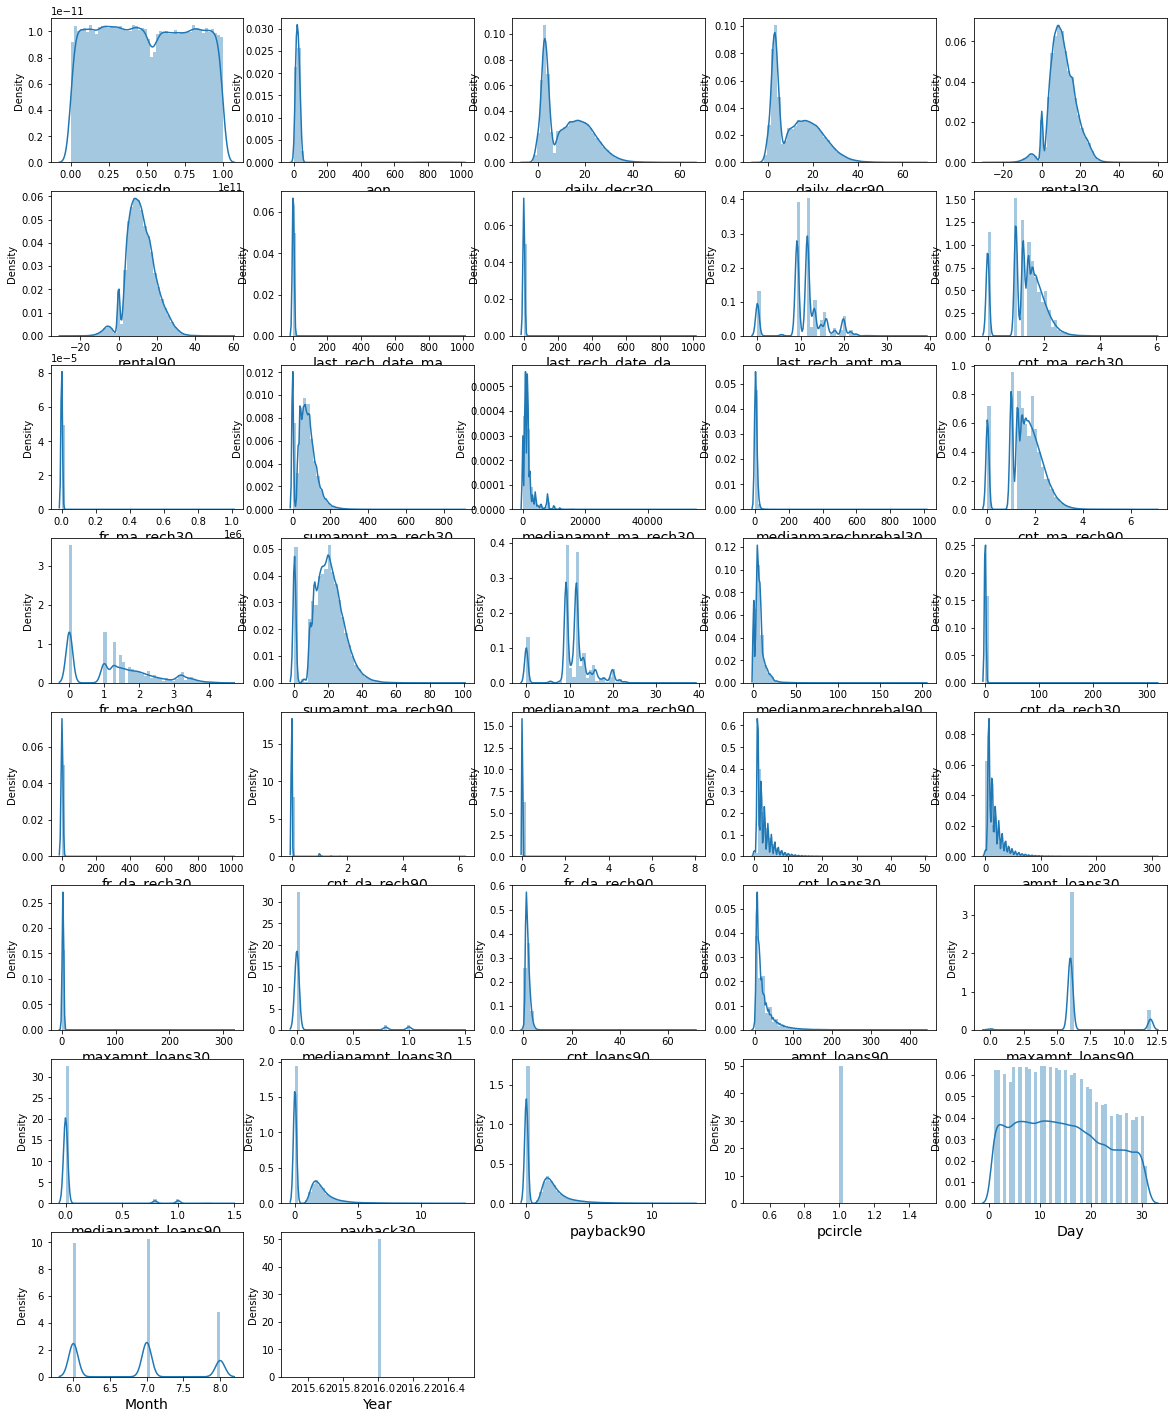

In [162]:
plt.figure(figsize = (20,25),facecolor = "white")
plotnumber = 1
for column in x:
    if plotnumber<=37:
        ax=plt.subplot(8,5,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=14)
        
    plotnumber+=1
plt.show()

as we reduce very much of skewness present in many columns 

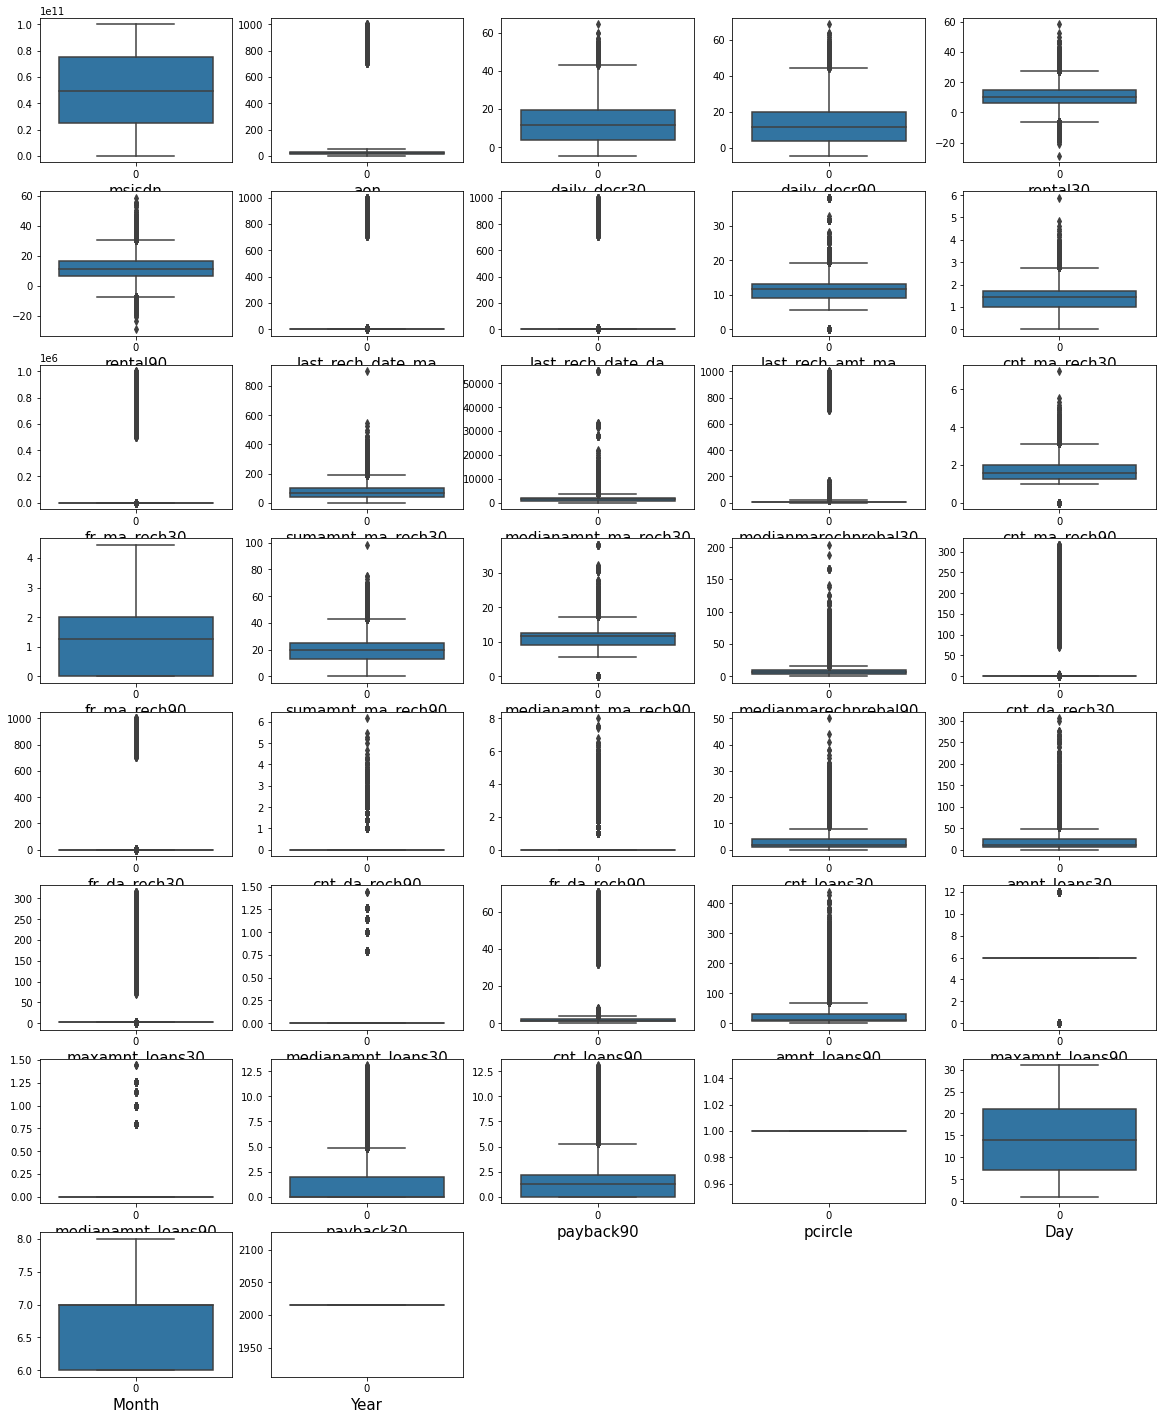

In [421]:
plt.figure(figsize = (20,25))
plotnumber = 1
for column in x:
    if plotnumber<=37:
        plt.subplot(8,5,plotnumber)
        ax=sns.boxplot(data=x[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [44]:
data.isnull().sum()

label                      0
msisdn                     0
aon                     1539
daily_decr30               0
daily_decr90               0
rental30                   0
rental90                   0
last_rech_date_ma       1315
last_rech_date_da         14
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30    1646
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
medianmarechprebal90    1730
cnt_da_rech30              0
fr_da_rech30               0
cnt_da_rech90              0
fr_da_rech90               0
cnt_loans30                0
amnt_loans30               0
maxamnt_loans30            0
medianamnt_loans30         0
cnt_loans90                0
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback30                  0
payback90                  0
pcircle       

In [374]:
# lets fill the nan and drop some column which have high skewness and highly correlated and having more outliers

In [45]:
data = data.drop(['daily_decr30','amnt_loans30','rental90',],axis=1)
data.head()

,label,msisdn,aon,daily_decr90,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Day,Month,Year
0,0,21408070789,16.492423,14.526152,6.038000,1.414214,0.0,11.545503,1.259921,21.0,...,1.414214,12,6,0.0,5.385165,5.385165,1,20,7,2016
1,1,76462070374,26.683328,22.973347,15.454616,4.472136,0.0,17.953584,1.000000,0.0,...,1.000000,12,12,0.0,0.000000,0.000000,1,10,8,2016
2,1,17943070372,23.130067,11.181560,9.655359,1.732051,0.0,11.545503,1.000000,0.0,...,1.000000,6,6,0.0,0.000000,0.000000,1,19,8,2016
3,1,55773070781,15.524175,2.768873,5.422267,6.403124,0.0,9.820117,0.000000,0.0,...,1.414214,12,6,0.0,0.000000,0.000000,1,6,6,2016
4,1,3813082730,30.773365,5.320595,10.319359,2.000000,0.0,13.217256,1.912931,2.0,...,2.645751,42,6,0.0,1.527525,1.527525,1,22,6,2016


# we can not drop too much columns because we can not loose more than 8% data

In [46]:
data['aon'] = data['aon'].fillna(data['aon'].mean())

In [47]:
data['last_rech_date_ma'] = data['last_rech_date_ma'].fillna(data['last_rech_date_ma'].mean())

In [48]:
data['medianmarechprebal30'] = data['medianmarechprebal30'].fillna(data['medianmarechprebal30'].mean())

In [49]:
data['medianmarechprebal90'] = data['medianmarechprebal90'].fillna(data['medianmarechprebal90'].mean())

In [50]:
data['last_rech_date_da'] = data['last_rech_date_da'].fillna(data['last_rech_date_da'].mean())

In [51]:
data.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr90            0
rental30                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
Day                     0
Month                   0
Year                    0
dtype: int64

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(x)

# USING SMOTE TECHNIQUES TO BALANCE THE DATA 

In [482]:
conda install -c conda-forge imbalanced-learn

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.14.0

Please update conda by running

    $ conda update -n base -c defaults conda





## Package Plan ##

  environment location: C:\Users\LENOVO\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.14.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.12.0-py39haa95532_0 --> conda-forge::conda-4.14.0-py39hcbf5309_0




imbalanced-learn-0.7 | 97 KB     |     

In [53]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [54]:
smote = SMOTE()

In [55]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x,y)

In [56]:
Counter = y.value_counts()

In [57]:
Counters = y_smote.value_counts()

In [58]:
print('ORIGINAL DATASET SHAPE', Counter)
print("==============================")
print("==============================")
print('RESAMPLE DATASET SHAPE', Counters)


ORIGINAL DATASET SHAPE 1    183431
0     26162
Name: label, dtype: int64
RESAMPLE DATASET SHAPE 0    183431
1    183431
Name: label, dtype: int64


# NOW OUR DATA LOOKS GOOD AND WE ARE READY TO BUILD THE MODEL

# 1-WITH LOGOSTIC REGRESSION

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test=train_test_split(x_smote,y_smote,test_size=.25,random_state=8)

In [506]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_lr)*100)
print('-------------------')
print('===================')
print('-------------------')
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy 76.1699158271185
-------------------
-------------------
[[37734  8356]
 [13500 32126]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78     46090
           1       0.79      0.70      0.75     45626

    accuracy                           0.76     91716
   macro avg       0.77      0.76      0.76     91716
weighted avg       0.76      0.76      0.76     91716



In [61]:
from sklearn.model_selection import cross_val_score

In [502]:
scr_lr = cross_val_score(lr,x,y,cv=5)
print("Cross Validation Score of logistic regression model is :- ",scr_lr.mean())

Cross Validation Score of logistic regression model is :-  0.8767897745799841


# 2- Decision tree classifier 

In [507]:
from sklearn.tree import DecisionTreeClassifier

In [508]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_dt)*100)
print('-------------------------')
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy 91.1073313271403
-------------------------
[[42273  3817]
 [ 4339 41287]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     46090
           1       0.92      0.90      0.91     45626

    accuracy                           0.91     91716
   macro avg       0.91      0.91      0.91     91716
weighted avg       0.91      0.91      0.91     91716



In [509]:
scr_dt = cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score of Decision TREE model is :-",scr_dt.mean())

Cross Validation Score of Decision TREE model is :- 0.8837890705498742


# 3- Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_rf)*100)
print('=======================================')
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

Accuracy 95.17750447032142
[[43877  2213]
 [ 2210 43416]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     46090
           1       0.95      0.95      0.95     45626

    accuracy                           0.95     91716
   macro avg       0.95      0.95      0.95     91716
weighted avg       0.95      0.95      0.95     91716



In [512]:
scr_rf = cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score of RANDOM FOREST model is :-",scr_rf.mean())

Cross Validation Score of RANDOM FOREST model is :- 0.9215574949122949


# 4- WITH GRADIENT BOOSTING CLASSIFIER

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gbd = GradientBoostingClassifier()
gbd.fit(x_train,y_train)
pred_gbd=gbd.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_gbd)*100)
print('=======================================')
print(confusion_matrix(y_test,pred_gbd))
print(classification_report(y_test,pred_gbd))

Accuracy 89.7531510314449
[[41818  4272]
 [ 5126 40500]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     46090
           1       0.90      0.89      0.90     45626

    accuracy                           0.90     91716
   macro avg       0.90      0.90      0.90     91716
weighted avg       0.90      0.90      0.90     91716



In [64]:
gbdt = cross_val_score(gbd,x,y,cv=5)
print("Cross Validation Score of GBDT model is :-",gbdt.mean())

Cross Validation Score of GBDT model is :- 0.9189381354240462


# 5- WITH KNN ALGO

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn=kn.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_kn)*100)
print('=======================================')
print(confusion_matrix(y_test,pred_kn))
print(classification_report(y_test,pred_kn))

Accuracy 87.99664180731824
[[45401   689]
 [10320 35306]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     46090
           1       0.98      0.77      0.87     45626

    accuracy                           0.88     91716
   macro avg       0.90      0.88      0.88     91716
weighted avg       0.90      0.88      0.88     91716



# So the difference between the cross val score and the accuracy score is  minimun for the Random forest as well as gives best accuracy, SO WE USED THIS algo


# BUT BEFORE USED HYPERPARAMETER TUNING WITH GRIDSEARCHCV

In [67]:
from sklearn.model_selection import GridSearchCV

In [71]:
parameters = {'max_depth':range(2,4),'min_samples_leaf':range(2,4),'min_samples_split':range(2,4),'n_estimators':[20,30,60,80]}

clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 60}


In [84]:
rf = RandomForestClassifier(max_depth= 3, min_samples_leaf=2, min_samples_split= 4, n_estimators= 70)

In [85]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=70)

In [86]:
y_pred = rf.predict(x_test)

In [87]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[36790,  9300],
       [ 9854, 35772]], dtype=int64)

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79     46090
           1       0.79      0.78      0.79     45626

    accuracy                           0.79     91716
   macro avg       0.79      0.79      0.79     91716
weighted avg       0.79      0.79      0.79     91716



In [89]:
print("ACCURACY",accuracy_score(y_test,y_pred))

ACCURACY 0.7911596667975054


In [90]:
# ROC CURVE 

fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [91]:
print('THRESHOLDS=',thresholds)
print('True positive rate=',tpr)
print('FAlse positive rate=',fpr)


THRESHOLDS= [2 1 0]
True positive rate= [0.         0.78402665 1.        ]
FAlse positive rate= [0.         0.20177913 1.        ]


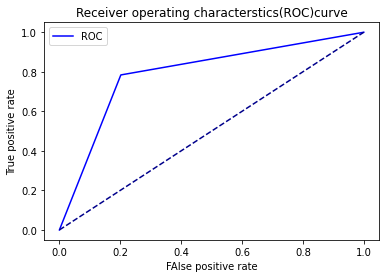

In [92]:
plt.plot(fpr,tpr,color = 'blue',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--')
plt.xlabel('FAlse positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characterstics(ROC)curve')
plt.legend()
plt.show()

In [93]:
# lets chk area it is covering(AUC)
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.7911237618386024


In [94]:
# saving the model for later prediction
import pickle

In [95]:
filename = 'MICRO CREDIT DEFAULTER.pickle'
pickle.dump(rf,open(filename,'wb'))

# HENCE MY MODEL IS READY TO PREDICT